<a href="https://colab.research.google.com/github/aakash-1998/Data-Science/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# !pip install pandas-datareader
import pandas_datareader as web

In [ ]:
data =  web.DataReader("SBIN.NS","yahoo",dt.datetime(2020,9,1),dt.datetime.now())

In [ ]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-01,218.899994,211.199997,213.100006,218.100006,75048313,218.100006
2020-09-02,219.000000,212.300003,218.250000,216.250000,47608088,216.250000
2020-09-03,218.250000,212.300003,217.500000,213.149994,38594129,213.149994
2020-09-04,212.300003,205.899994,210.000000,206.600006,54435758,206.600006
2020-09-07,209.649994,205.399994,207.500000,207.899994,35687359,207.899994
2020-09-08,208.500000,202.899994,207.899994,204.050003,34146789,204.050003
2020-09-09,201.399994,192.500000,201.100006,194.850006,72715826,194.850006
2020-09-10,201.449997,195.199997,197.699997,198.149994,67789617,198.149994
2020-09-11,203.850006,197.000000,198.550003,202.699997,48487971,202.699997


In [ ]:
df = data.reset_index()
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [ ]:
df.shape

(15, 7)

In [ ]:
actual_price = df.tail(1)
actual_price

,Date,High,Low,Open,Close,Volume,Adj Close
14,2020-09-21,193.5,184.25,193.050003,185.800003,57579914,185.800003


In [ ]:
# prepare the data for training the SVR models
df = df.head(len(df)-1)
print(df)

         Date        High         Low  ...       Close    Volume   Adj Close
0  2020-09-01  218.899994  211.199997  ...  218.100006  75048313  218.100006
1  2020-09-02  219.000000  212.300003  ...  216.250000  47608088  216.250000
2  2020-09-03  218.250000  212.300003  ...  213.149994  38594129  213.149994
3  2020-09-04  212.300003  205.899994  ...  206.600006  54435758  206.600006
4  2020-09-07  209.649994  205.399994  ...  207.899994  35687359  207.899994
5  2020-09-08  208.500000  202.899994  ...  204.050003  34146789  204.050003
6  2020-09-09  201.399994  192.500000  ...  194.850006  72715826  194.850006
7  2020-09-10  201.449997  195.199997  ...  198.149994  67789617  198.149994
8  2020-09-11  203.850006  197.000000  ...  202.699997  48487971  202.699997
9  2020-09-14  206.199997  197.350006  ...  198.500000  63605531  198.500000
10 2020-09-15  201.000000  197.100006  ...  200.149994  51761038  200.149994
11 2020-09-16  200.050003  196.250000  ...  198.199997  52404964  198.199997

In [ ]:
#  Create empty list to store the dependent and independent data
days = []
adj_close_prices = []

In [ ]:
# Get the dates and adjusted close prices
df_days = df.loc[:,"Date"]
df_adj_close = df.loc[:,"Adj Close"]
df_days

0    2020-09-01
1    2020-09-02
2    2020-09-03
3    2020-09-04
4    2020-09-07
5    2020-09-08
6    2020-09-09
7    2020-09-10
8    2020-09-11
9    2020-09-14
10   2020-09-15
11   2020-09-16
12   2020-09-17
13   2020-09-18
Name: Date, dtype: datetime64[ns]

In [ ]:
# Create the independent dataset 
for i in range(len(df_days)):
  days.append([df.Date.dt.day[i]])
# create the dependent dataset
for j in df_adj_close:
  adj_close_prices.append( float (j))  

In [ ]:
print(days)
print(adj_close_prices)

[[1], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18]]
[218.10000610351562, 216.25, 213.14999389648438, 206.60000610351562, 207.89999389648438, 204.0500030517578, 194.85000610351562, 198.14999389648438, 202.6999969482422, 198.5, 200.14999389648438, 198.1999969482422, 195.4499969482422, 192.60000610351562]


In [ ]:
# Create the 3 Support Vector Regression Models
# Create and Train a SVR Model using a linear kernel
lin_svr = SVR(kernel="linear",C=1000.0)
lin_svr.fit(days,adj_close_prices)

# Create and Train a SVR Model using a Polynomial kernel
poly_svr = SVR(kernel="poly",C=1000.0,degree=2)
poly_svr.fit(days,adj_close_prices)

# Create and Train a SVR Model using a rbf kernel
rbf_svr = SVR(kernel="rbf",C=1000.0)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

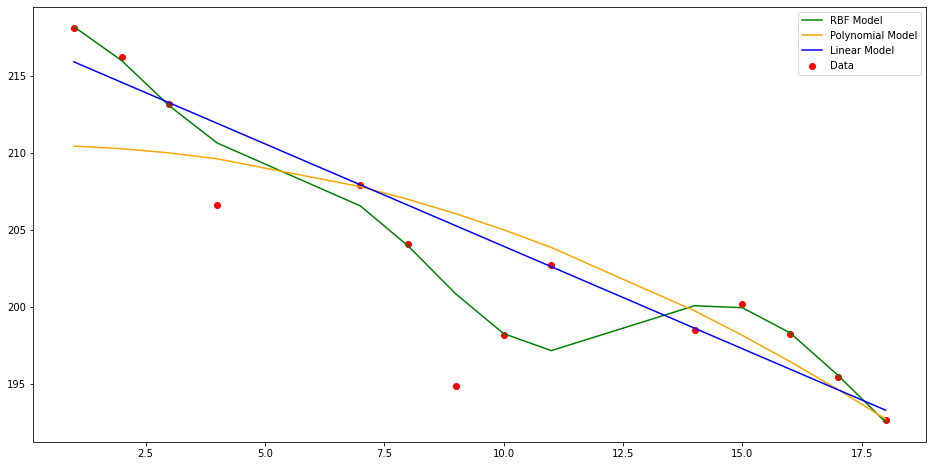

In [ ]:
# plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(days,adj_close_prices,color="red",label="Data")
plt.plot(days,rbf_svr.predict(days),color="green",label="RBF Model")
plt.plot(days,poly_svr.predict(days),color="orange",label="Polynomial Model")
plt.plot(days,lin_svr.predict(days),color="blue",label="Linear Model")
plt.legend()
plt.show()

In [ ]:
rbf_svr.predict([[35]])

array([200.93777493])

In [ ]:
df.Date

0    2020-09-01
1    2020-09-02
2    2020-09-03
3    2020-09-04
4    2020-09-07
5    2020-09-08
6    2020-09-09
7    2020-09-10
8    2020-09-11
9    2020-09-14
10   2020-09-15
11   2020-09-16
12   2020-09-17
13   2020-09-18
Name: Date, dtype: datetime64[ns]